In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install bioinfokit
from bioinfokit.visuz import cluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58647 sha256=02e8764599e2f1bc9bf7428043de01eb28b7b5599dab0084736dc7344d79eded
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


In [2]:
df = pd.read_csv("/content/mcdonalds.csv")

In [3]:
df.shape

(1453, 15)

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [9]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [10]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

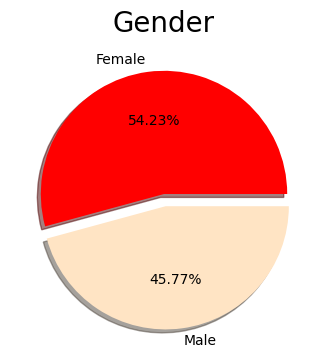

In [11]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'bisque']
explode = [0, 0.1]
plt.figure(figsize=(5, 4))
plt.pie(size, colors = colors, explode = explode, shadow=True, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.show()

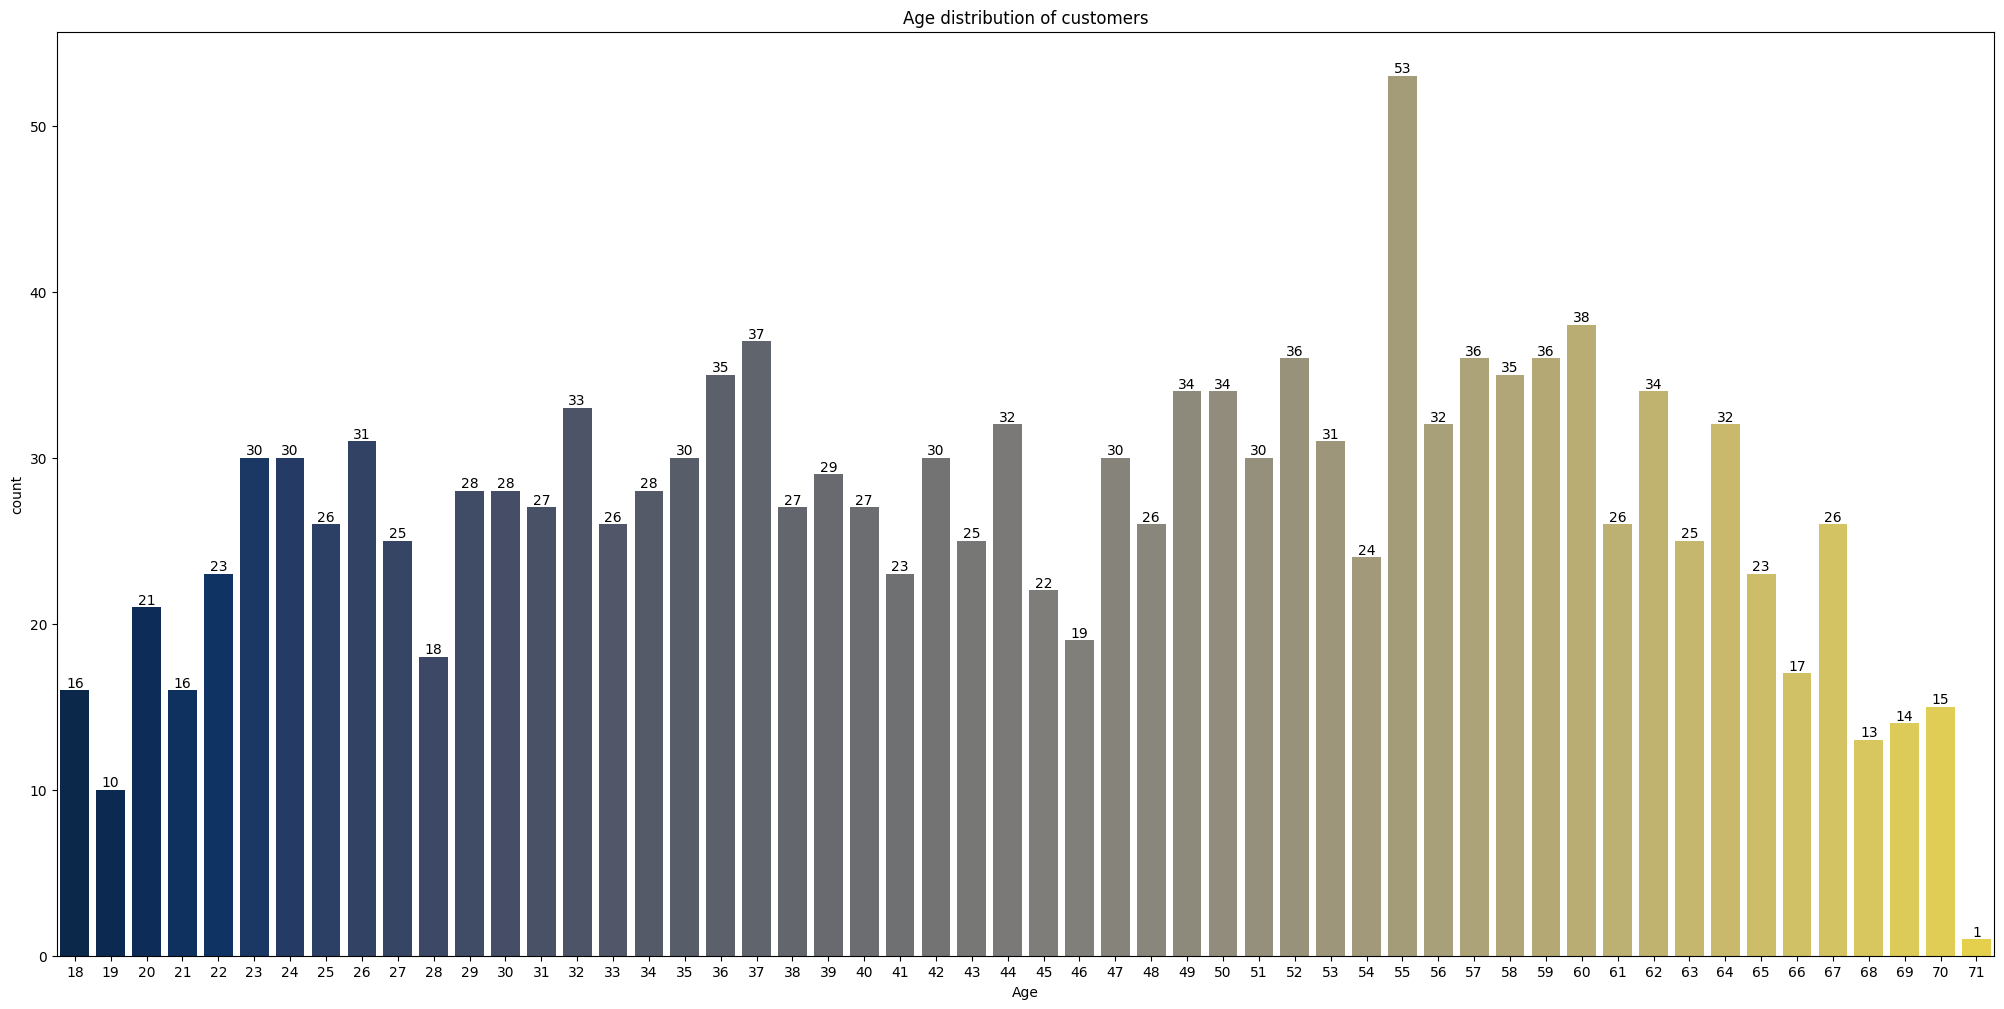

In [12]:
plt.rcParams['figure.figsize'] = (25, 12)
f = sns.countplot(x=df['Age'],palette = 'cividis')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

In [14]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

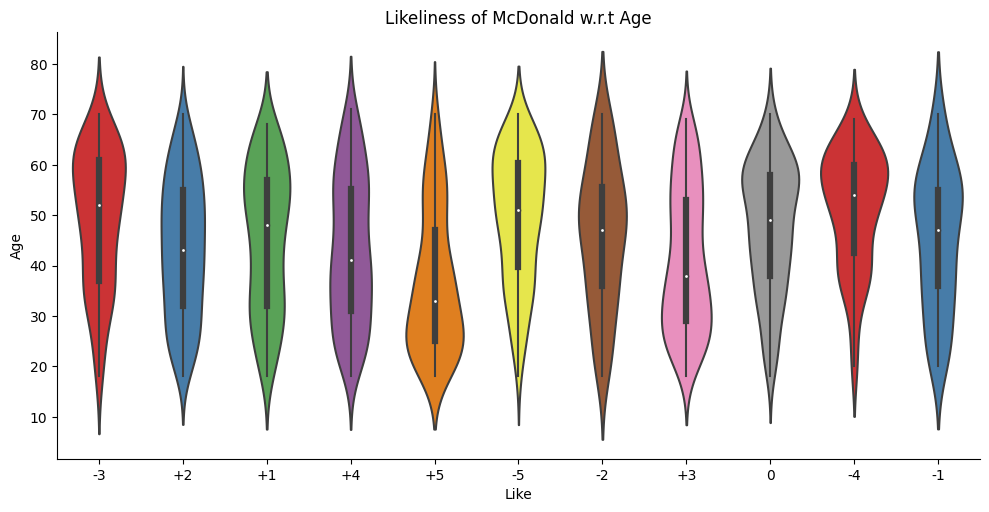

In [15]:
sns.catplot(x="Like", y="Age",data=df, orient="v", height=5, aspect=2, palette="Set1", kind="violin")
plt.title('Likeliness of McDonald w.r.t Age')
plt.show()

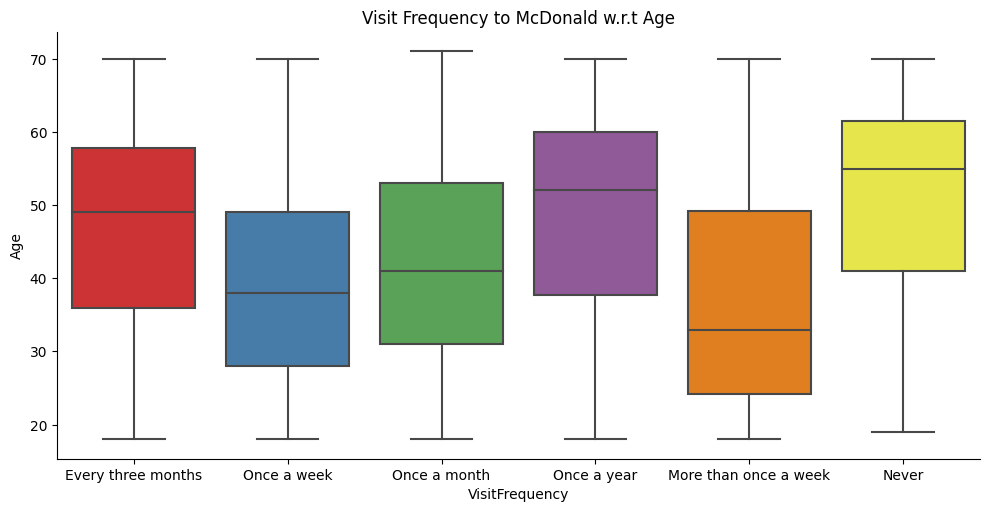

In [16]:
sns.catplot(x="VisitFrequency", y="Age",data=df, orient="v", height=5, aspect=2, palette="Set1", kind="box")
plt.title('Visit Frequency to McDonald w.r.t Age')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [50]:
label_encoder = LabelEncoder()
df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [51]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0,1,1


In [52]:
df_segments = df.loc[:,cat]
df_segments

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [53]:
# for i in cat:
#     print(df_segments[i].value_counts())

def percentage_of_feature_values(df, feature, target_value):
    total_count = df[feature].count()
    target_count = df[feature].eq(target_value).sum()
    percentage = (target_count / total_count) * 100
    result = {
        "column_name": feature,
        "target_value": target_value,
        "percentage": round(percentage, 2)
    }
    return result

for i in cat:
    print(percentage_of_feature_values(df_segments, i, 1))
    print(percentage_of_feature_values(df_segments, i, 0))

{'column_name': 'yummy', 'target_value': 1, 'percentage': 55.26}
{'column_name': 'yummy', 'target_value': 0, 'percentage': 44.74}
{'column_name': 'convenient', 'target_value': 1, 'percentage': 90.78}
{'column_name': 'convenient', 'target_value': 0, 'percentage': 9.22}
{'column_name': 'spicy', 'target_value': 1, 'percentage': 9.36}
{'column_name': 'spicy', 'target_value': 0, 'percentage': 90.64}
{'column_name': 'fattening', 'target_value': 1, 'percentage': 86.72}
{'column_name': 'fattening', 'target_value': 0, 'percentage': 13.28}
{'column_name': 'greasy', 'target_value': 1, 'percentage': 52.65}
{'column_name': 'greasy', 'target_value': 0, 'percentage': 47.35}
{'column_name': 'fast', 'target_value': 1, 'percentage': 90.02}
{'column_name': 'fast', 'target_value': 0, 'percentage': 9.98}
{'column_name': 'cheap', 'target_value': 1, 'percentage': 59.88}
{'column_name': 'cheap', 'target_value': 0, 'percentage': 40.12}
{'column_name': 'tasty', 'target_value': 1, 'percentage': 64.42}
{'column_n

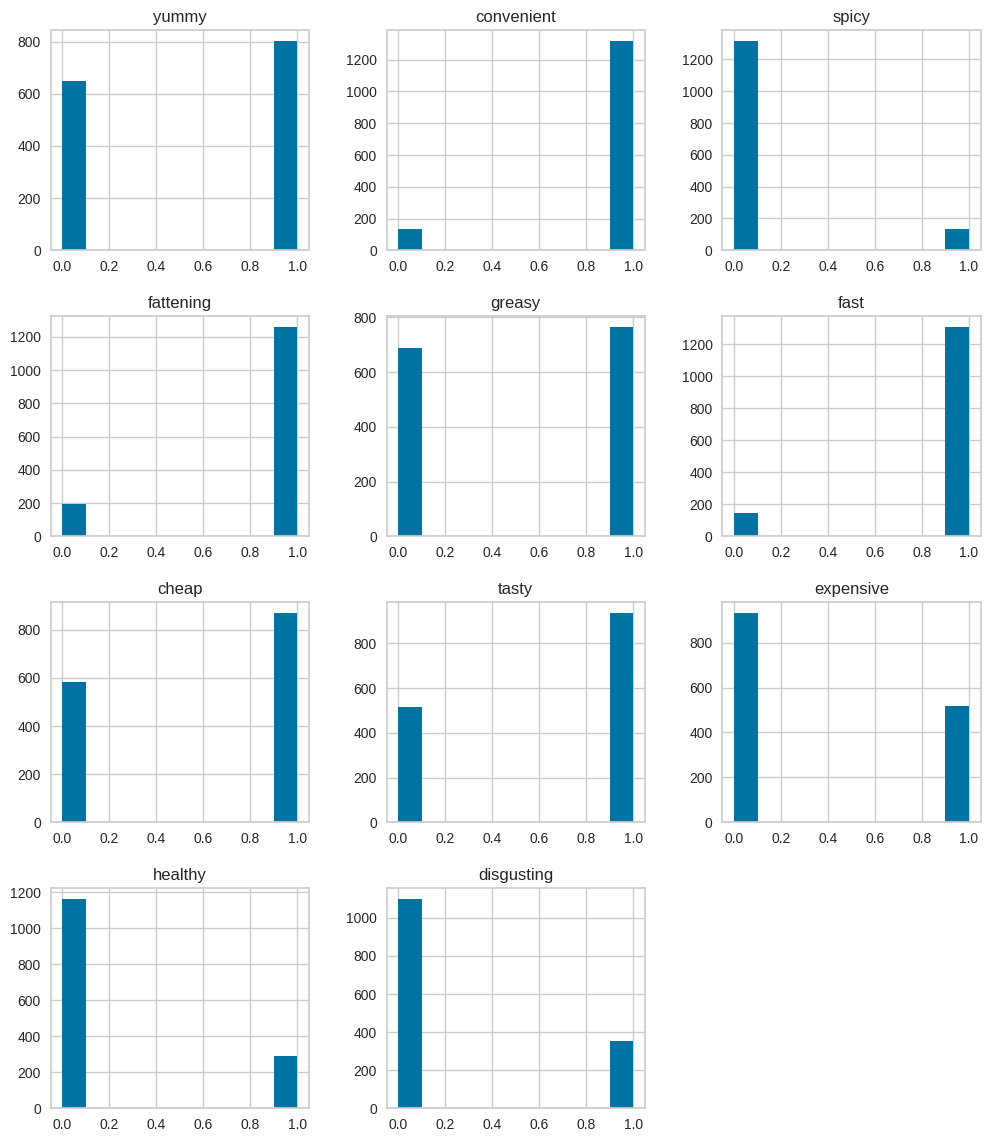

In [54]:
plt.rcParams['figure.figsize'] = (12,14)
df_segments.hist()
plt.show()

In [55]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [56]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,2


In [57]:
df_segments.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [58]:
df.to_csv("/content/mcdonalds_cleaned.csv")

In [59]:
df_segments.to_csv("/content/mcdonals_segments.csv")

In [60]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)

In [61]:
pca = PCA(n_components=11)
pca_fit = pca.fit_transform(x_scaled)

In [62]:
components = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pca_df = pd.DataFrame(data = pca_fit, columns = components)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [63]:
variance_components = pca.explained_variance_
variance_components

array([2.81316617, 1.6329477 , 1.38111047, 1.08171127, 0.91895162,
       0.78253978, 0.71533376, 0.59270042, 0.52426978, 0.3078135 ,
       0.25703129])

In [64]:
variance_components_ratio = pca.explained_variance_ratio_
variance_components_ratio

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [65]:
standard_deviation_components = np.sqrt(variance_components)
standard_deviation_components

array([1.67724959, 1.27786842, 1.17520657, 1.04005349, 0.95861964,
       0.88461278, 0.84577406, 0.76987039, 0.72406476, 0.55480943,
       0.50698253])

In [66]:
standard_deviation_components_ratio = standard_deviation_components / np.sum(standard_deviation_components)
standard_deviation_components_ratio

array([0.16104   , 0.12269368, 0.11283667, 0.09986004, 0.09204123,
       0.08493551, 0.08120643, 0.07391859, 0.0695206 , 0.05326966,
       0.04867759])

In [67]:
cumulative_sum_components_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum_components_ratio

array([0.25556637, 0.40391399, 0.52938308, 0.62765279, 0.71113635,
       0.78222737, 0.84721295, 0.90105773, 0.94868581, 0.9766496 ,
       1.        ])

In [68]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_segments.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


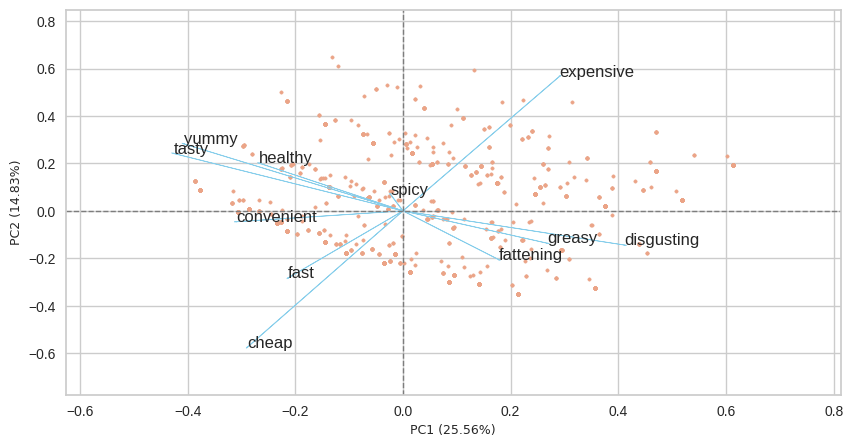

In [69]:
pca_scores = PCA().fit_transform(x_scaled)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings = loadings, labels = df_segments.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10,5))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

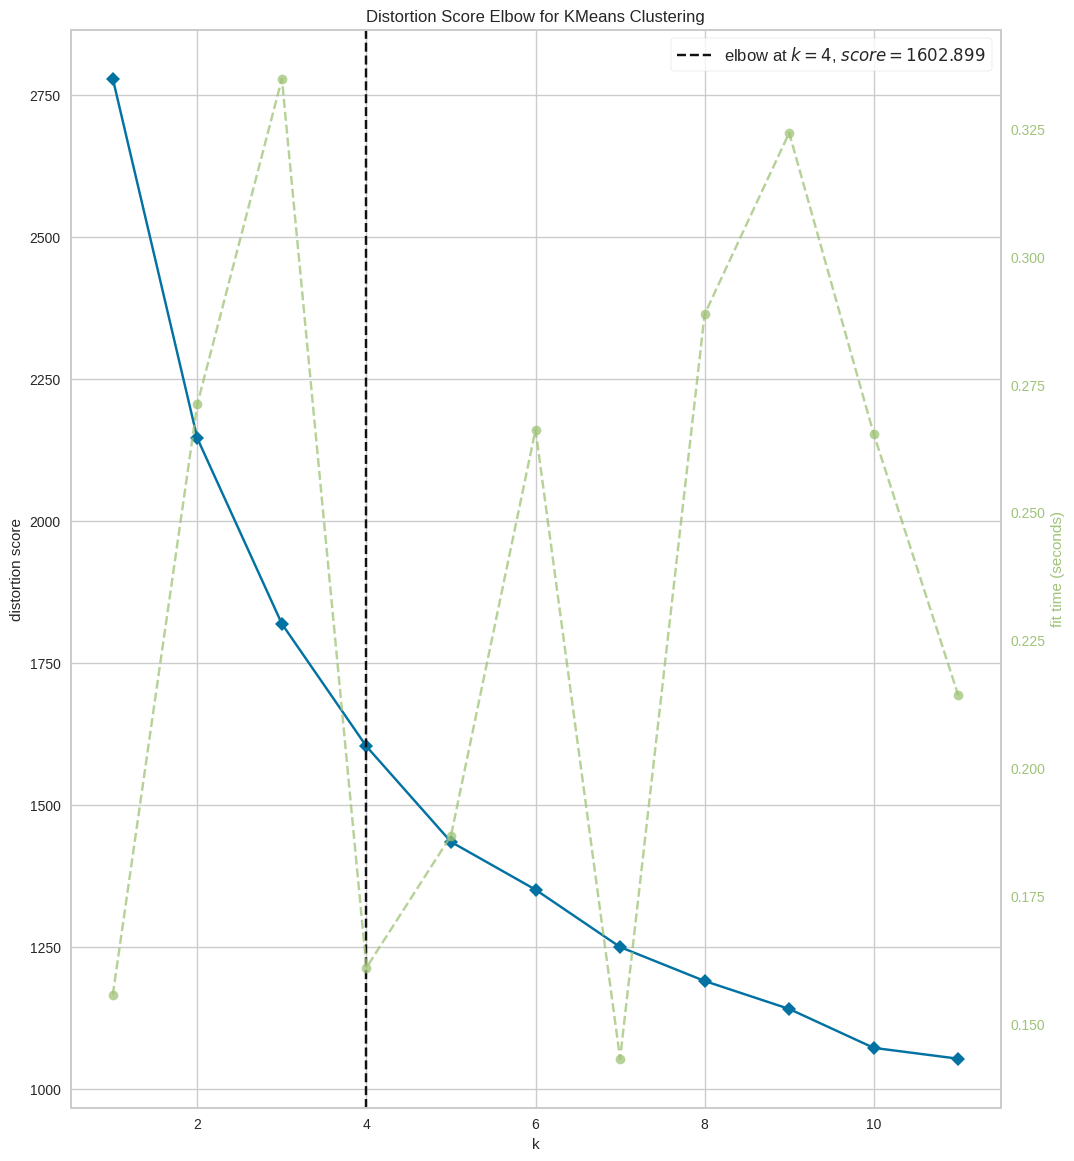

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
#Extracting segments
df_eleven = df.loc[:,cat]
df_eleven
#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [71]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [72]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

In [73]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


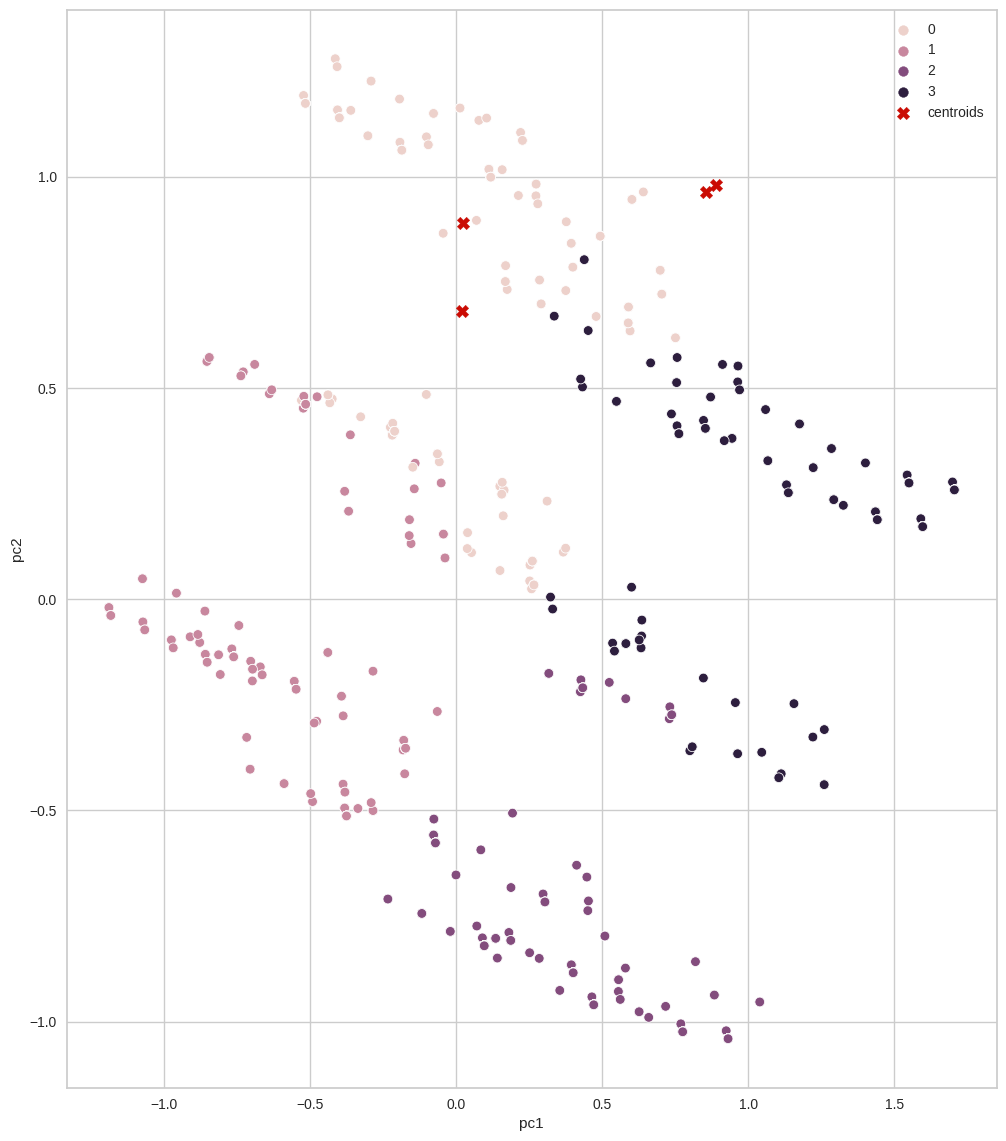

In [74]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [75]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


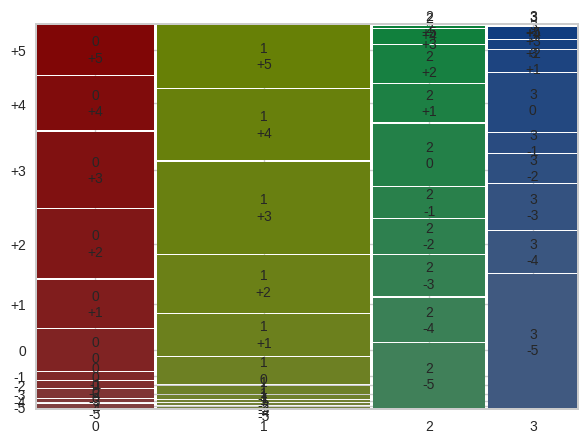

In [76]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

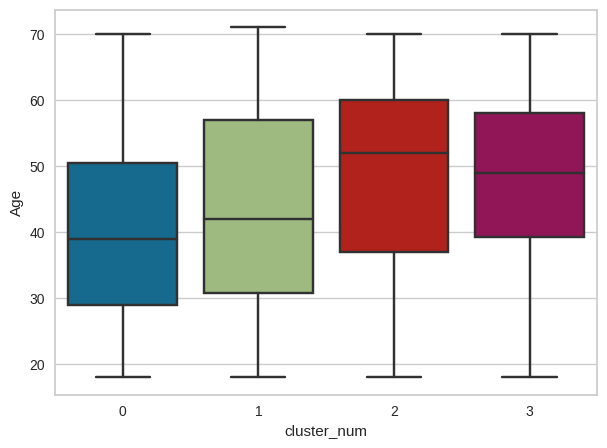

In [77]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

#Step 6 : Profiling Segments

In [79]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
pca_df_kmeans.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,0
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,3
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,0
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,0
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,3


In [81]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df)
pca_df_kmeans1= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
cluster1_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==0]
cluster1_analysis.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,0,0,0,0
16,1,1,0,1,1,1,1,1,0,0,0,0,34,3,0,1,0
19,1,1,0,1,1,1,0,1,1,0,1,+5,37,1,1,0,0
20,1,1,0,1,1,1,0,1,1,0,1,+2,41,5,0,0,0
21,1,1,0,1,0,1,1,1,1,0,0,+2,36,3,1,1,0


<ipython-input-83-c3d13d3c74c2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


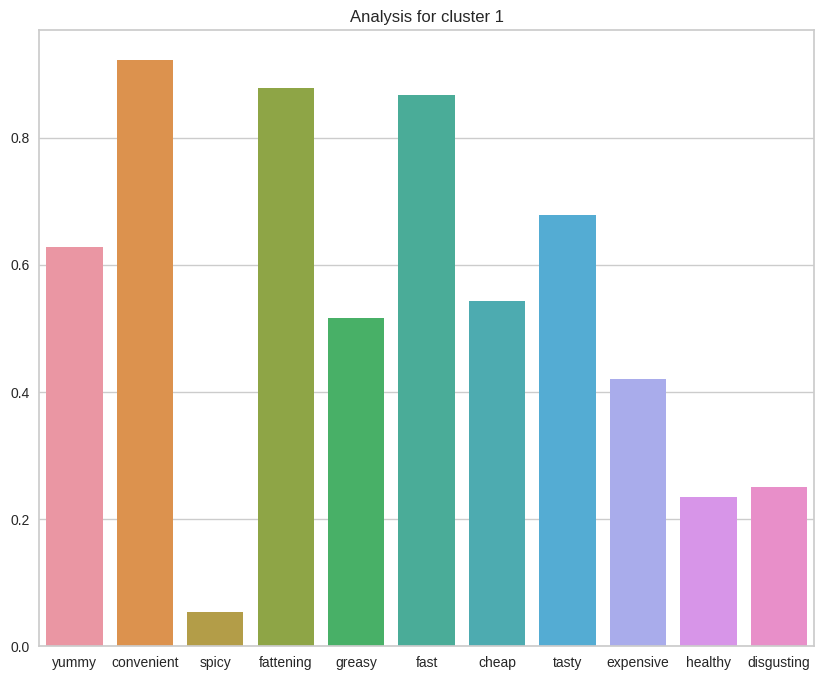

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()

<ipython-input-84-282075d10b63>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


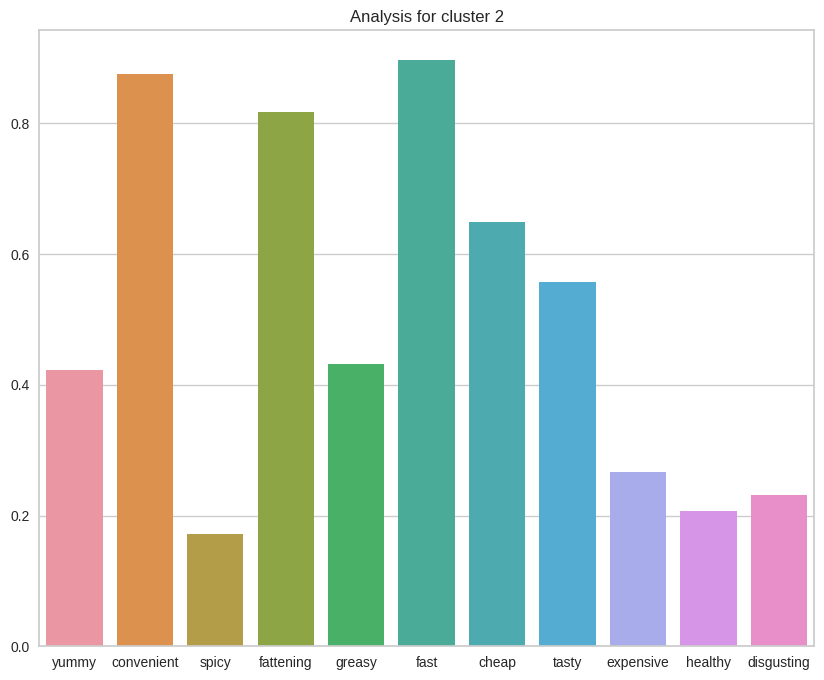

In [84]:
cluster2_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==1]
plt.figure(figsize=(10,8))
sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 2')
plt.show()

<ipython-input-85-776e2af6922f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


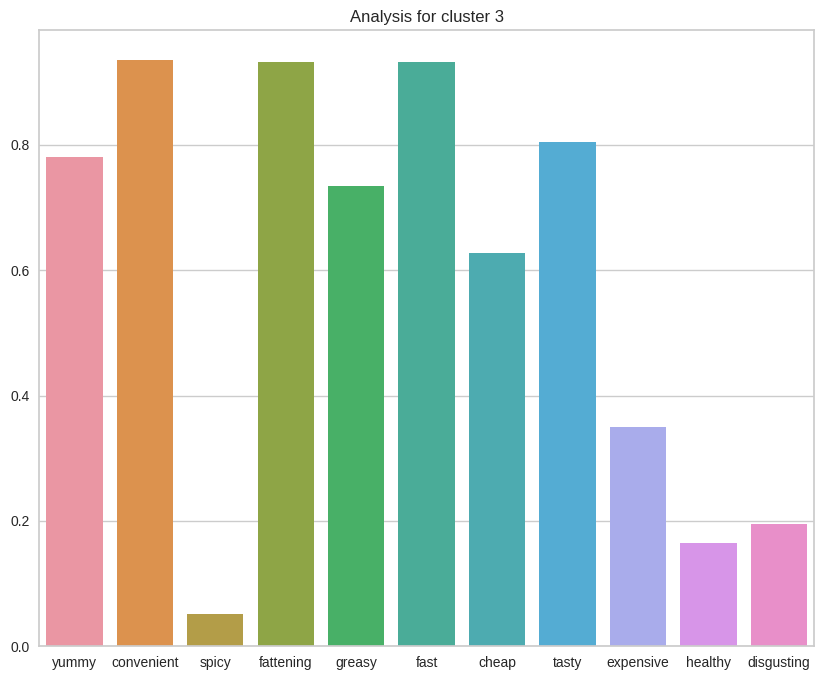

In [85]:
cluster3_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==2]
plt.figure(figsize=(10,8))
sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 3')
plt.show()

<ipython-input-86-981dbcfba81f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


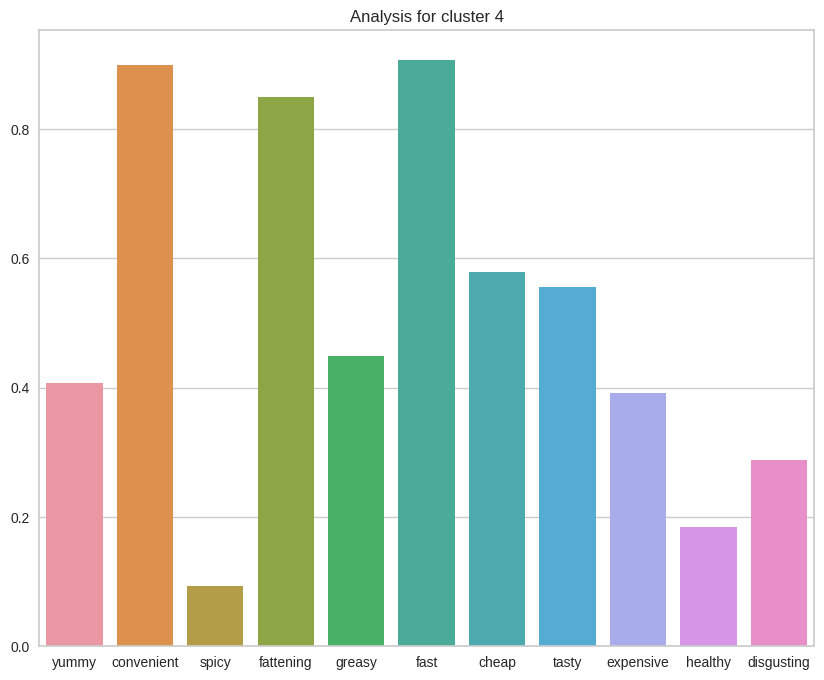

In [86]:
cluster4_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==3]
plt.figure(figsize=(10,8))
sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 4')
plt.show()

#Step 7: Describing Segments

In [87]:
df= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,2,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,2,3


In [88]:
df['Like'].value_counts()


+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [100]:
df['cluster'].value_counts()

3    378
0    376
1    371
2    328
Name: cluster, dtype: int64

In [89]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender,cluster_num,cluster
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955,2.637990,0.457674,1.325533,1.487268
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178,1.756057,0.498377,1.001728,1.135155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000,3.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000,4.000000,1.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,5.000000,1.000000,3.000000,3.000000


In [109]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10, '+5':10})
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,0,0,2,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,0,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,6,62,0,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,5,1,3,3
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,4,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,3,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,0,1,1,0


In [110]:
df['Like'].value_counts()

8     229
7     187
5     169
9     160
6     152
0     152
10    143
2      73
1      71
3      59
4      58
Name: Like, dtype: int64

<Figure size 2400x2400 with 0 Axes>

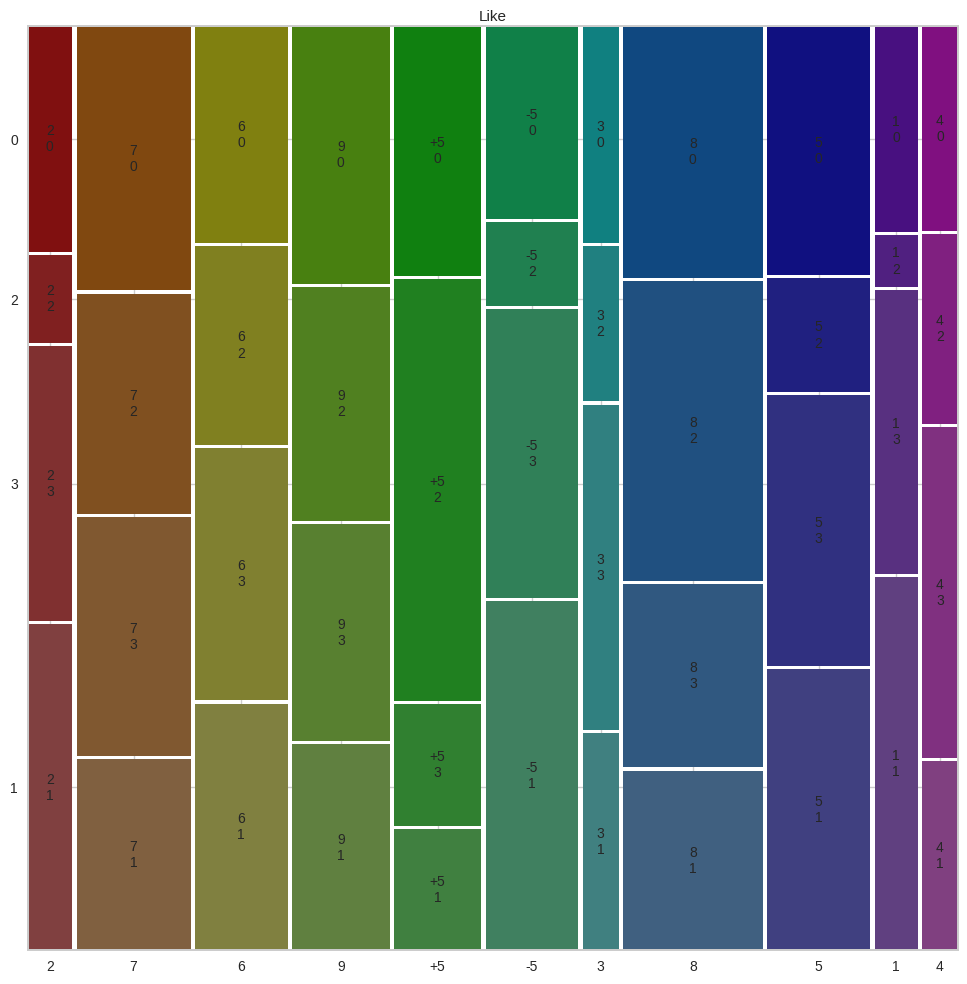

In [91]:
plt.rcParams['figure.figsize']=(12,12)
plt.figure(figsize=(12,12),dpi=200)
mosaic(df,['Like','cluster'])
plt.xlabel('Like')
plt.show()

In [92]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [93]:
df['Gender'].value_counts()

0    788
1    665
Name: Gender, dtype: int64

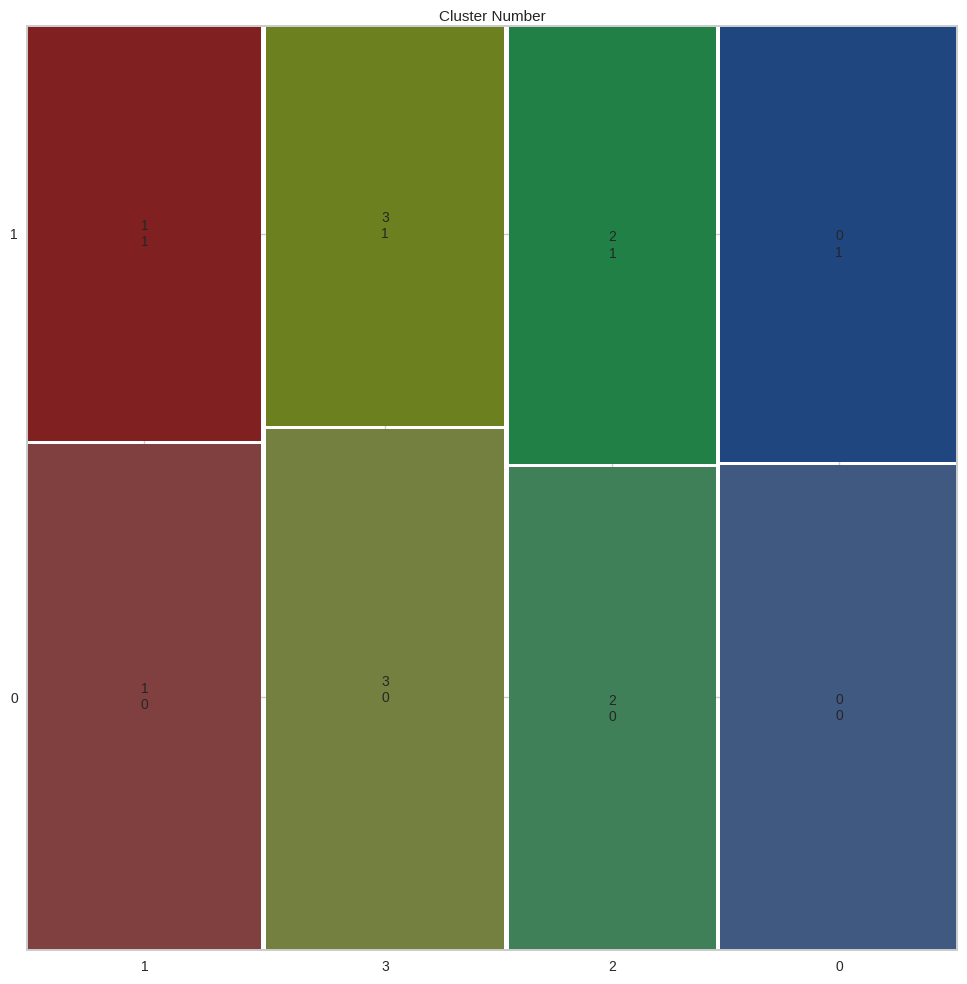

In [94]:
mosaic(df,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()

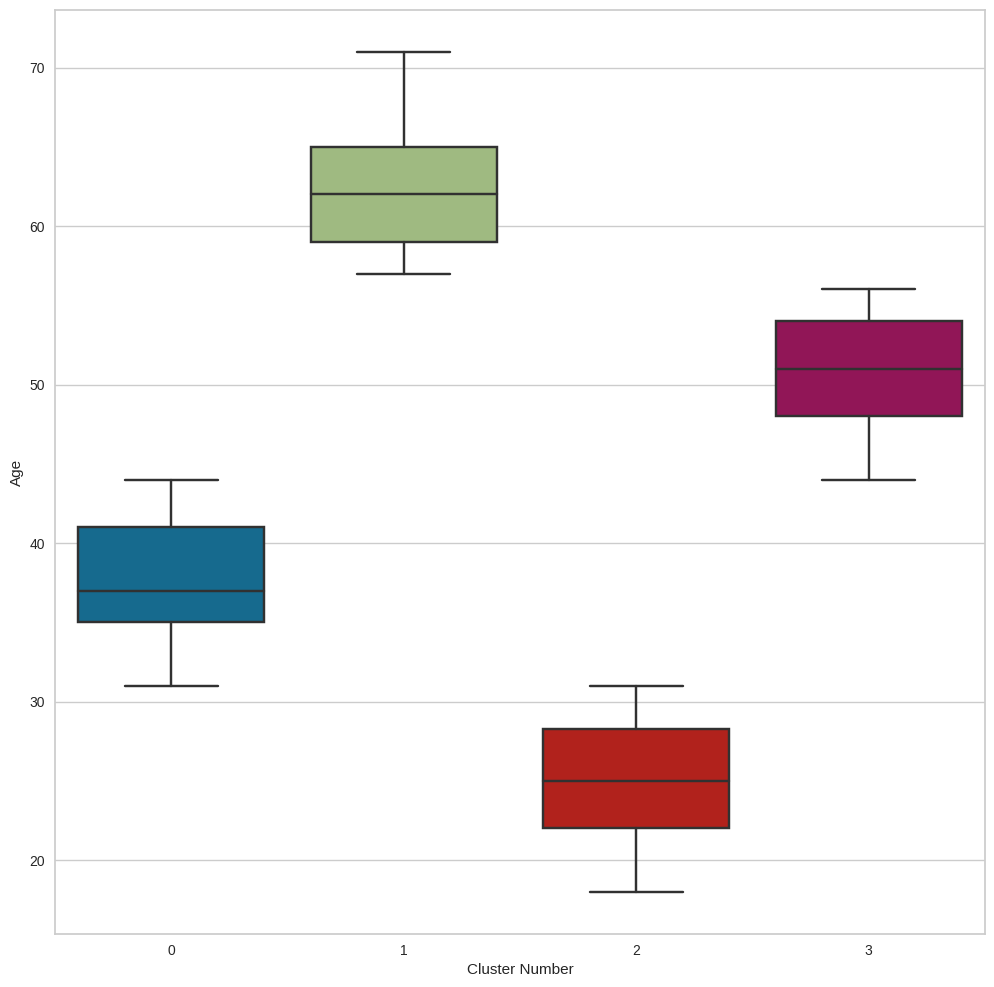

In [95]:
sns.boxplot(x=df['cluster'], y=df['Age'])
plt.xlabel('Cluster Number')
plt.show()

In [128]:
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit

cluster
0    2.731383
1    2.533693
2    2.682927
3    2.608466
Name: VisitFrequency, dtype: float64

In [111]:
like = df.groupby('cluster')['Like'].mean()
like

cluster
0    6.034574
1    4.916442
2    7.143293
3    5.179894
Name: Like, dtype: float64

In [118]:
female_mask = df['Gender'] == 1
proportion_female = df[female_mask].groupby('cluster').size() / df.groupby('cluster').size()

proportion_female

cluster
0    0.473404
1    0.450135
2    0.475610
3    0.433862
dtype: float64

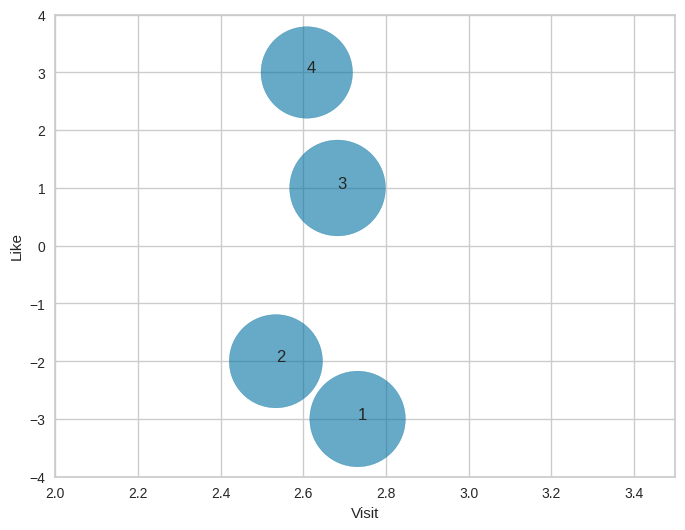

In [136]:
bubble_sizes = [10000 * f for f in proportion_female]

plt.figure(figsize=(8, 6))
ax = plt.gca()

plt.scatter(visit, like, s=bubble_sizes, alpha=0.6)
plt.xlim(2,3.5)
plt.ylim(-4, 4)

for i in range(len(visit)):
    plt.text(visit[i], like[i], str(i+1))

plt.xlabel('Visit')
plt.ylabel('Like')

plt.show()

Members of the segment 4 like McDonald’s, where the visiting frequency of all the segments is quite the same. The
segments 3 and 4 need to be retained, and their needs must be satisfied in the future.
Members of the segment 1
hate McDonald’s, making them unattractive as a potential
market segment. Market segment 1 does not currently perceive McDonald’s in a
positive way.Marketing action could attempt to address the negative perceptions of this
segment, and re-inforce positive perceptions. As a result, McDonald’s may be able
to broaden its customer base